In [1]:
edvoldata = read.csv("EGDailyVolume.csv",header=T)
## Process Dates
year = edvoldata$Year
month = edvoldata$Month
day = edvoldata$Day
datemat = cbind(as.character(day),as.character(month),as.character(year))
paste.dates = function(date){
    day = date[1]; month=date[2]; year = date[3]
    return(paste(day,month,year,sep="/"))
 }
dates = apply(datemat,1,paste.dates)
dates = as.Date(dates, format="%d/%m/%Y")
edvoldata = cbind(dates,edvoldata)
attach(edvoldata)
Volume.tr = sqrt(Volume+3/8)

The following object is masked _by_ .GlobalEnv:

    dates



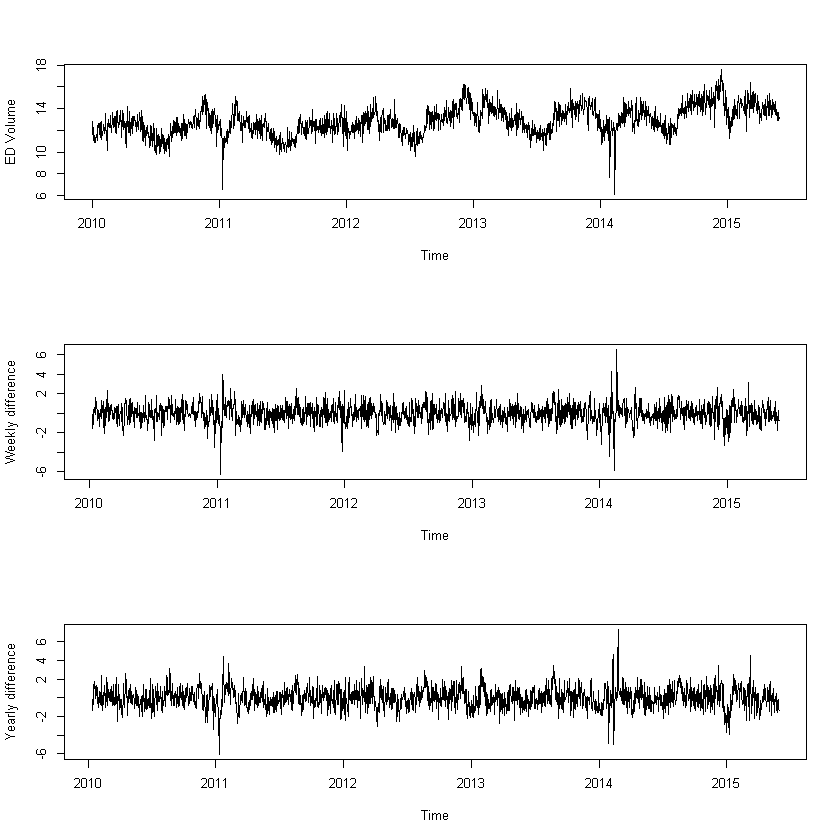

In [3]:
#DIFFERENCING
volume.ts = ts(Volume.tr,start=c(2010,1,1),frequency=365.25)
dvolume7=diff(volume.ts,7) # weekly
dvolume12=diff(volume.ts,12) # monthly (annual)

#plot time series and difference processes
par(mfrow=c(3,1))
ts.plot(volume.ts,ylab="ED Volume")
ts.plot(dvolume7,ylab="Weekly difference")
ts.plot(dvolume12,ylab="Yearly difference")

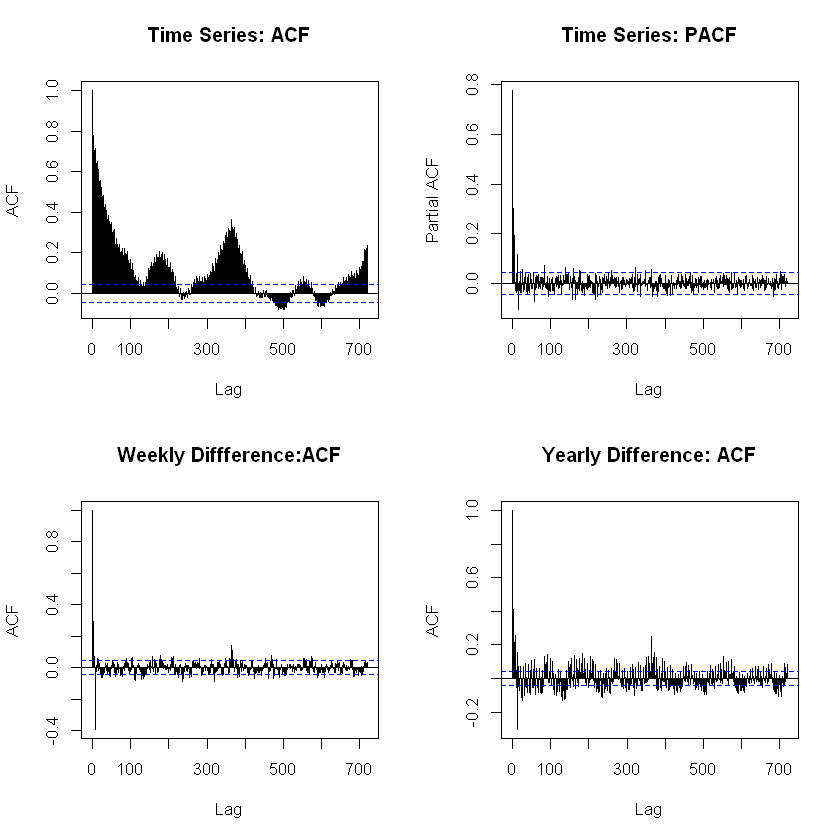

In [4]:
par(mfrow=c(2,2))
acf(as.vector(volume.ts), main='Time Series: ACF',lag.max=360*2)
acf(as.vector(volume.ts),type="partial", main='Time Series: PACF',lag.max=360*2)
acf(as.vector(dvolume7) , main='Weekly Diffference:ACF',lag.max=360*2)
acf(as.vector(dvolume12), main='Yearly Difference: ACF',lag.max=360*2)

In [5]:
## Model Fitting ARIMA(5,1,5)+seasonal ARMA(1,1)
mod = arima(volume.ts, order = c(5,1,5),seasonal = list(order = c(1,0,1),period=7),method = "ML")

Warning message in arima(volume.ts, order = c(5, 1, 5), seasonal = list(order = c(1, :
"possible convergence problem: optim gave code = 1"

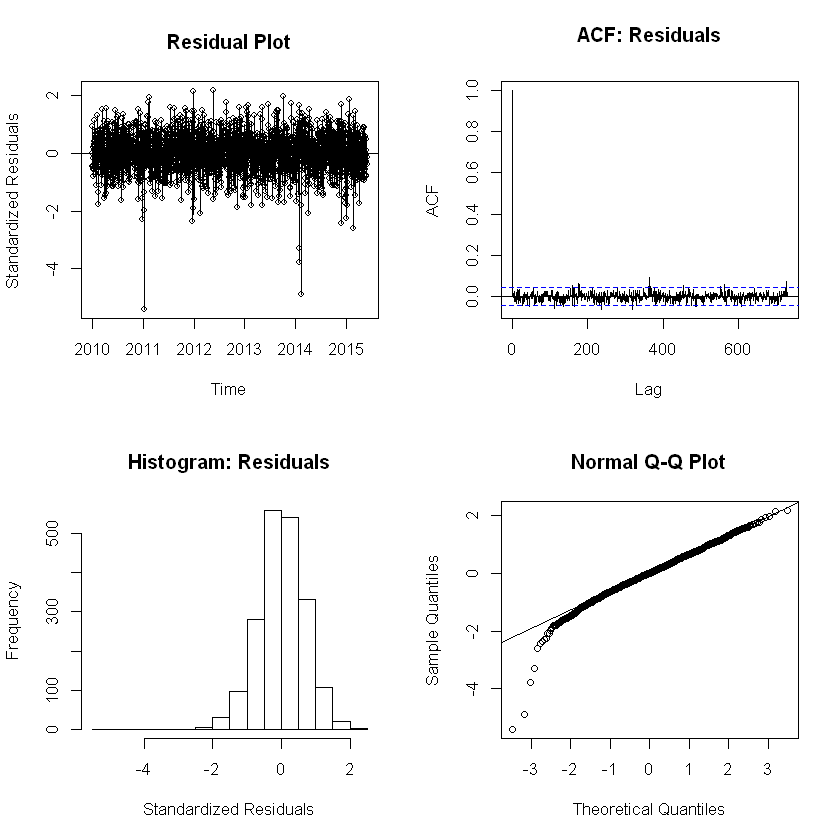

In [8]:
par(mfrow=c(2,2))
# residual analysis
plot(resid(mod), ylab='Standardized Residuals',type='o',main="Residual Plot")
abline(h=0)
acf(as.vector(resid(mod)),lag.max=365*2,main="ACF: Residuals")
hist(resid(mod),xlab='Standardized Residuals',main='Histogram: Residuals')
qqnorm(resid(mod))
qqline(resid(mod))

MAKE the (p,d,q,P,D,Q) equation!!

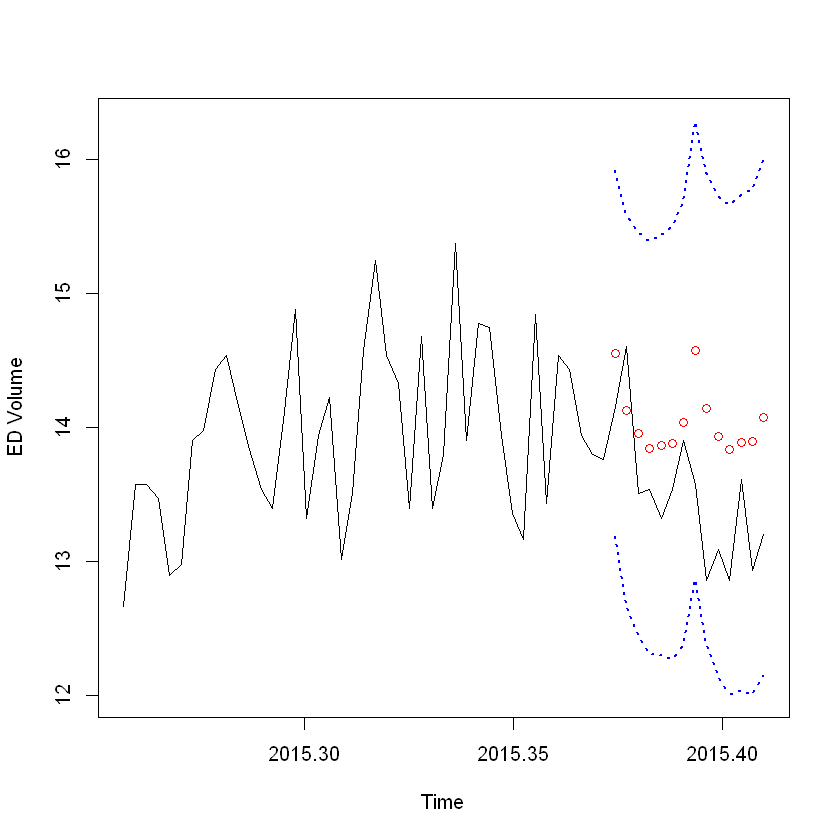

In [7]:
## Forecasting with ARIMA: 2 Weeks Ahead
n = length(volume.ts)
nfit = n-14
outvol = arima(volume.ts[1:nfit], order = c(5,1,5),seasonal = list(order = c(1,0,1),period=7),method = "ML",optim.control=list(maxit=1000))
out_pred = as.vector(predict(outvol,n.ahead=14))

timevol=time(volume.ts)
ubound = out_pred$pred+1.96*out_pred$se
lbound = out_pred$pred-1.96*out_pred$se
ymin = min(lbound)
ymax = max(ubound)
plot(timevol[(n-56):n],volume.ts[(n-56):n],type="l", ylim=c(ymin,ymax), xlab="Time", ylab="ED Volume")
points(timevol[(nfit+1):n],out_pred$pred,col="red")
lines(timevol[(nfit+1):n],ubound,lty=3,lwd= 2, col="blue")
lines(timevol[(nfit+1):n],lbound,lty=3,lwd= 2, col="blue")

In [14]:
print(out_pred)

$pred
Time Series:
Start = 1964 
End = 1977 
Frequency = 1 
 [1] 14.55309 14.12765 13.95422 13.84679 13.86869 13.88461 14.03415 14.57651
 [9] 14.14386 13.93371 13.83273 13.88930 13.89591 14.07580

$se
Time Series:
Start = 1964 
End = 1977 
Frequency = 1 
 [1] 0.6948667 0.7405342 0.7664714 0.7858857 0.8016792 0.8226170 0.8441302
 [8] 0.8713161 0.8947084 0.9135495 0.9304895 0.9451474 0.9633954 0.9831280

